In [3]:
import pandas as pd

# Nous collectons les données sur la population urbaine et le PIB par habitant pour les pays suivants : France, États-Unis, Chine, Brésil et Inde
# Nous utilisons un échantillon de pays pour des raisons de lisibilité
# Nous nous concentrons sur la période 2000-2020
# Les données sont disponibles sur le site de la Banque mondiale : https://donnees.banquemondiale.org/indicateur/SP.URB.TOTL.IN.ZS?locations=FR

# récupération des données
urban_pop = pd.read_csv("../input/API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_553.csv", skiprows=4)
gdp_per_capita = pd.read_csv("../input/API_NY.GDP.MKTP.KD.ZG_DS2_fr_csv_v2_2076.csv", skiprows=4)

# nettoyage des données
urban_pop = urban_pop.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Urban Population (%)") # melt permet de transformer les colonnes en lignes
gdp_per_capita = gdp_per_capita.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Croissance du PIB (% annuel)")
urban_pop = urban_pop[pd.to_numeric(urban_pop['Year'], errors='coerce').notnull()] # on garde les lignes où l'année est un nombre
gdp_per_capita = gdp_per_capita[pd.to_numeric(gdp_per_capita['Year'], errors='coerce').notnull()]
urban_pop["Year"] = urban_pop["Year"].astype(int) # on convertit l'année en entier
gdp_per_capita["Year"] = gdp_per_capita["Year"].astype(int)

# fusion des données dans un seul dataframe
df = pd.merge(urban_pop, gdp_per_capita, on=["Country Name", "Country Code", "Year"])
df = df[(df["Year"] >= 2000) & (df["Year"] <= 2020)] # on garde les données entre 2000 et 2020
df = df[df["Country Code"].notnull()] # on garde les données pour les pays suivants : France, États-Unis, Chine, Brésil et Inde
df.to_csv("../output/donnees_monde.csv", index=False) # on sauvegarde les données dans un fichier CSV

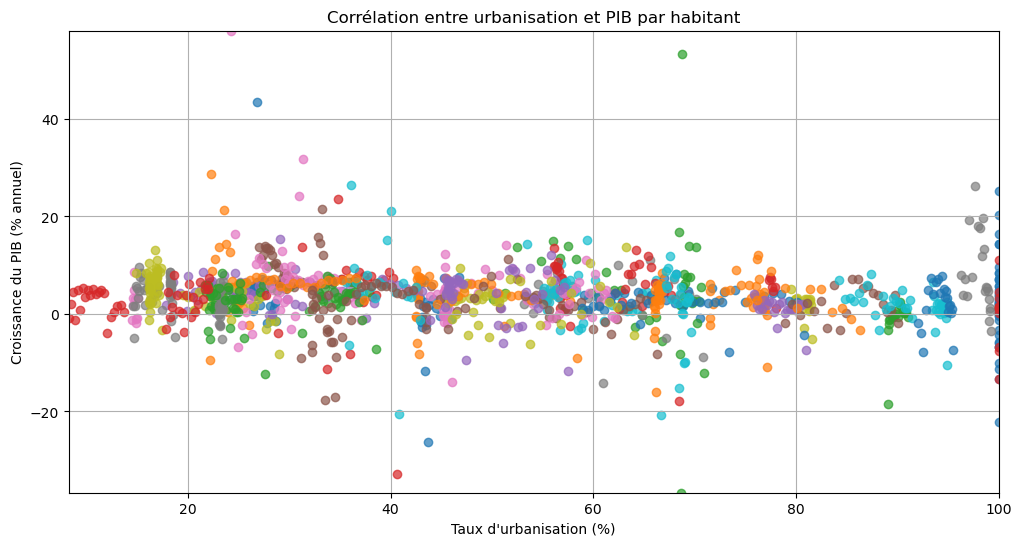

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Nous affichons un nuage de points pour visualiser la corrélation entre le taux d'urbanisation et le PIB par habitant
# Chaque pays est représenté par un point de couleur différente

df = pd.read_csv("../output/donnees_monde.csv")

# création du nuage de points
plt.figure(figsize=(12, 6)) # taille de la figure
for country in df["Country Name"].unique(): # pour chaque pays
    subset = df[df["Country Name"] == country] # on récupère les données du pays
    plt.scatter(subset["Urban Population (%)"], subset["Croissance du PIB (% annuel)"], label=country, alpha=0.7)
plt.xlabel("Taux d'urbanisation (%)")
plt.ylabel("Croissance du PIB (% annuel)")
plt.title("Corrélation entre urbanisation et PIB par habitant")
plt.xlim([min(df["Urban Population (%)"]), max(df["Urban Population (%)"])]) # limites des axes
plt.ylim([min(df["Croissance du PIB (% annuel)"]), max(df["Croissance du PIB (% annuel)"])])
plt.grid(True)
plt.show()

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Nous utilisons une régression linéaire pour modéliser la relation entre le taux d'urbanisation et le PIB par habitant
# Nous utilisons le logarithme du PIB par habitant et du taux d'urbanisation pour linéariser la relation

df = pd.read_csv("../output/donnees_monde.csv")
df['GDP per capita'] = np.log(df["Croissance du PIB (% annuel)"])
df['Urban Population (%)'] = np.log(df['Urban Population (%)'])

# Remove rows with NaN or infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Croissance du PIB (% annuel)", 'Urban Population (%)'])

X = df['Urban Population (%)']
X = sm.add_constant(X) # on ajoute une colonne de 1 pour l'ordonnée à l'origine
y = df["Croissance du PIB (% annuel)"]
model = sm.OLS(y, X).fit() # régression linéaire : c'est un modèle qui explique une variable dépendante par une ou plusieurs variables indépendantes
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Croissance du PIB (% annuel)   R-squared:                       0.014
Model:                                      OLS   Adj. R-squared:                  0.013
Method:                           Least Squares   F-statistic:                     18.46
Date:                          Mon, 10 Mar 2025   Prob (F-statistic):           1.86e-05
Time:                                  10:38:48   Log-Likelihood:                -4154.2
No. Observations:                          1304   AIC:                             8312.
Df Residuals:                              1302   BIC:                             8323.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

c:\Users\irahi\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\irahi\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


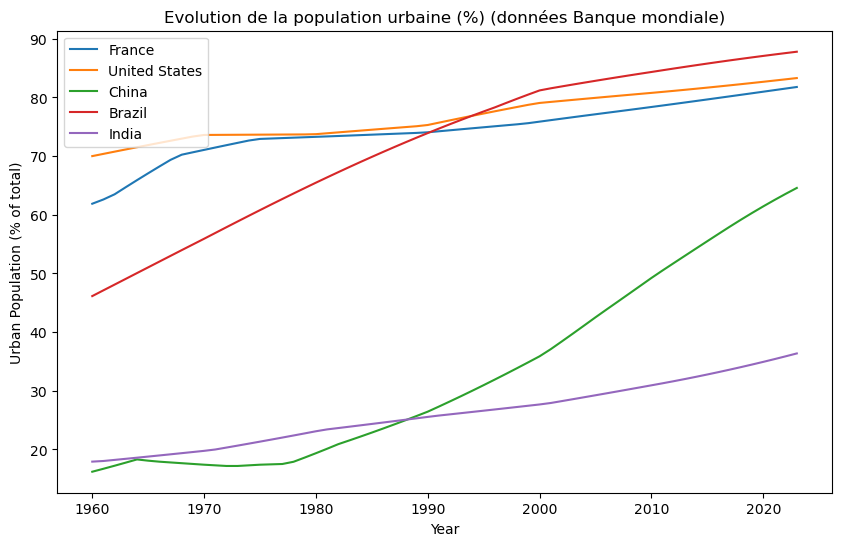

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Nous affichons l'évolution de la population urbaine pour les pays suivants : France, États-Unis, Chine, Brésil et Inde
# Les données sont issues de la Banque mondiale

csv_file = "../input/API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_553.csv"
df = pd.read_csv(csv_file, skiprows=4)
countries = ['France', 'United States', 'China', 'Brazil', 'India']
df_countries = df[df['Country Name'].isin(countries)]
df_long = df_countries.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],var_name='Year',value_name='Urban Population')
df_long = df_long[pd.to_numeric(df_long['Year'], errors='coerce').notnull()]
df_long['Year'] = df_long['Year'].astype(int)
df_long['Urban Population'] = pd.to_numeric(df_long['Urban Population'], errors='coerce')
df_long = df_long.sort_values(['Country Name', 'Year'])
plt.figure(figsize=(10, 6))
for country in countries:
    df_country = df_long[df_long['Country Name'] == country]
    plt.plot(df_country['Year'], df_country['Urban Population'], label=country)
plt.xlabel('Year')
plt.ylabel('Urban Population (% of total)')
plt.title('Evolution de la population urbaine (%) (données Banque mondiale)')
plt.legend(loc='upper left')
plt.show()